In [ ]:
# install packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

### 1. class GoldPriceAnalyzer

In [4]:
class GoldPriceAnalyzer:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = self.load_data()
        self.returns_df = self.calculate_returns()

    def load_data(self):
        """Loads the CSV file into a pandas DataFrame."""
        try:
            df = pd.read_csv(self.file_path)
            df['Date'] = pd.to_datetime(df['Date'])
            print("Data loaded successfully.")
            return df
        except FileNotFoundError:
            raise FileNotFoundError(f"File not found: {self.file_path}")
        
    def calculate_returns(self):
        """Calculates daily returns for all financial instruments."""
        if self.df is None:
            return None
        
        # Select all numerical columns except 'Date'
        numerical_cols = self.df.select_dtypes(include=['float64']).columns.tolist()
        
        # Calculate percentage change for these columns
        returns_df = self.df[numerical_cols].pct_change().dropna()
        print("\nDaily returns calculated successfully.")
        return returns_df
        
    def inspect_data(self):
        """Displays key information about the dataset."""
        if self.df is None:
            return

        print("\n--- first 5 rows of the data ---")
        print(self.df.head())

        print("\n--- data basic info ---")
        self.df.info()

        print("\n--- descriptive statistics ---")
        print(self.df.describe())
        
        print("\n--- missing values per column ---")
        print(self.df.isnull().sum())
        
        print("\n--- total duplicate rows ---")
        print(self.df.duplicated().sum())
        
    def filter_by_time(self, start_date, end_date):
        """Filters the DataFrame to include data from a specific year onwards."""
        if self.df is None:
            return None
        
        filtered_df = self.df[(self.df['Date'] >= start_date) & (self.df['Date']<= end_date)].copy()
        return filtered_df

    def get_yearly_mean(self, column_name):
        """Calculates the mean of a column, grouped by year."""
        if self.df is None:
            return None
            
        self.df['Year'] = self.df['Date'].dt.year
        yearly_mean = self.df.groupby('Year')[column_name].mean()
        # yearly_std = self.df.groupby('Year')[column_name].std()
        print(f"\nAverage {column_name} price by year: {yearly_mean}")
        return yearly_mean
    
    def explore_ml_model(self, features, target):
        """Trains a Linear Regression model using daily returns."""
        if self.returns_df is None:
            return
        
        # We will use the returns_df for modeling
        X = self.returns_df[features]
        y = self.returns_df[target]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)

        # Evaluate the model's performance
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        
        print("\n--- Linear Regression Model Results on Returns ---")
        print("Model Coefficients:")
        for i, feature in enumerate(features):
            print(f"- {feature} Return: {model.coef_[i]:.4f}")
        print(f"Intercept: {model.intercept_:.4f}")
        print("\n--- Model Evaluation on Test Data ---")
        print(f"R-squared (R²): {r2:.4f}")
        print(f"Mean Squared Error (MSE): {mse:.4f}")
        
        return model
    
    def create_cumulative_return_plot(self, columns, title):
        """
        Plots the cumulative returns of selected instruments.
        This method remains the same as it already works with returns.
        """
        if self.df is None:
            return

        plt.figure(figsize=(12, 8))
        
        # Use the stored returns_df for calculation
        df_returns = self.returns_df[columns]

        for col in columns:
            cumulative_returns = (1 + df_returns[col]).cumprod()
            plt.plot(self.df['Date'].iloc[1:], cumulative_returns, label=col) # Match date to returns_df

        plt.title(title)
        plt.xlabel('Date')
        plt.ylabel('Cumulative Return')
        plt.legend(title='Financial Instruments')
        plt.grid(True)
        plt.show()

### 2. Analysis

##### Load Data

In [5]:
file_path = './gold_data_2015_25.csv'
analyzer = GoldPriceAnalyzer(file_path)

Data loaded successfully.

Daily returns calculated successfully.


##### Inspect Data

In [6]:

analyzer.inspect_data()


--- first 5 rows of the data ---
        Date          SPX         GLD         USO    SLV   EUR/USD
0 2015-01-02  2058.199951  114.080002  159.119995  15.11  1.208941
1 2015-01-05  2020.579956  115.800003  150.320007  15.50  1.194643
2 2015-01-06  2002.609985  117.120003  144.399994  15.83  1.193902
3 2015-01-07  2025.900024  116.430000  146.960007  15.85  1.187536
4 2015-01-08  2062.139893  115.940002  148.399994  15.64  1.183600

--- data basic info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2666 non-null   datetime64[ns]
 1   SPX      2666 non-null   float64       
 2   GLD      2666 non-null   float64       
 3   USO      2666 non-null   float64       
 4   SLV      2666 non-null   float64       
 5   EUR/USD  2666 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 125.1 KB

--- descrip

##### filtering data by time

In [7]:
df_2025_subset = analyzer.filter_by_time('2025-01-01', '2025-08-01')
print(df_2025_subset)

           Date          SPX         GLD        USO        SLV   EUR/USD
2513 2025-01-02  5868.549805  245.419998  76.930000  26.930000  1.035186
2514 2025-01-03  5942.470215  243.490005  77.919998  26.980000  1.026821
2515 2025-01-06  5975.379883  243.190002  77.300003  27.240000  1.030535
2516 2025-01-07  5909.029785  244.559998  78.169998  27.330000  1.038637
2517 2025-01-08  5918.250000  245.860001  77.300003  27.400000  1.034554
...         ...          ...         ...        ...        ...       ...
2652 2025-07-28  6389.770020  305.410004  77.169998  34.639999  1.175682
2653 2025-07-29  6370.859863  306.250000  79.800003  34.660000  1.159676
2654 2025-07-30  6362.899902  300.959991  81.040001  33.509998  1.155095
2655 2025-07-31  6339.390137  302.959991  79.589996  33.320000  1.142936
2656 2025-08-01  6238.009766  309.109985  77.459999  33.590000  1.142374

[144 rows x 6 columns]


##### calculate mean price by year

In [8]:
yearly_means = analyzer.get_yearly_mean(['GLD', 'SLV'])
print(yearly_means)


Average ['GLD', 'SLV'] price by year:              GLD        SLV
Year                       
2015  111.146032  14.993929
2016  119.362619  16.290754
2017  119.714940  16.142289
2018  120.177331  14.776892
2019  131.561872  15.183944
2020  166.653755  19.161067
2021  168.311230  23.280754
2022  167.905139  20.077371
2023  180.449880  21.460080
2024  221.099484  25.826032
2025  288.867581  30.767516
             GLD        SLV
Year                       
2015  111.146032  14.993929
2016  119.362619  16.290754
2017  119.714940  16.142289
2018  120.177331  14.776892
2019  131.561872  15.183944
2020  166.653755  19.161067
2021  168.311230  23.280754
2022  167.905139  20.077371
2023  180.449880  21.460080
2024  221.099484  25.826032
2025  288.867581  30.767516


##### explore linear regression

In [15]:
features = ['SPX', 'EUR/USD', 'SLV']
target = 'GLD'
model = analyzer.explore_ml_model(features, target)


--- Linear Regression Model Results on Returns ---
Model Coefficients:
- SPX Return: -0.0984
- EUR/USD Return: 0.0205
- SLV Return: 0.4290
Intercept: 0.0002

--- Model Evaluation on Test Data ---
R-squared (R²): 0.6114
Mean Squared Error (MSE): 0.0000


##### Visualization

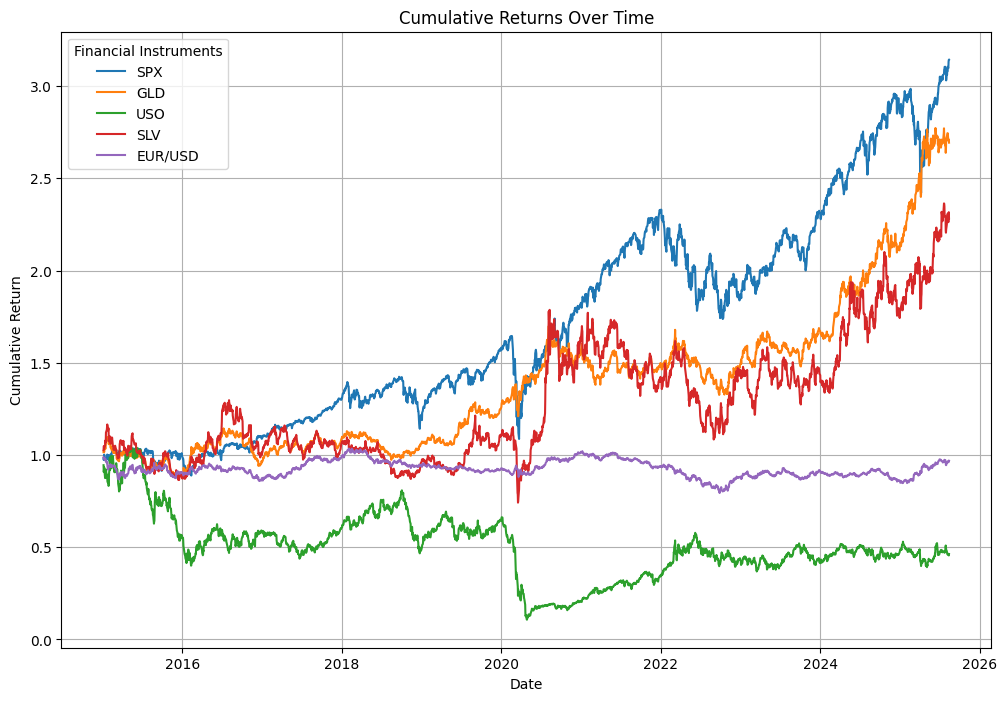

In [16]:
analyzer.create_cumulative_return_plot(columns=['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], title='Cumulative Returns Over Time')